<a href="https://colab.research.google.com/github/lakshayae162/EDA/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/lakshayae162/EDA/blob/main/Chapter4.ipynb

# **MODULE 4 - EXERCISES**

## **1-D STATISTICAL ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, chi2_contingency
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Loading dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)

1. Measures of Central Tendency

In [ ]:
# Central tendency measures for 'Anger' column
mean_val = data['Anger'].mean()
median_val = data['Anger'].median()
mode_val = data['Anger'].mode()[0]

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 20.003164556962027
Median: 19.0
Mode: 19


2. Measures of Dispersion

In [ ]:
# Dispersion measures for 'Anger' column
std_dev = data['Anger'].std()
variance = data['Anger'].var()
range_val = data['Anger'].max() - data['Anger'].min()

print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_val}")

Standard Deviation: 4.8411387670260755
Variance: 23.43662456160275
Range: 28


3. Skewness and Kurtosis Measure

In [ ]:
# Skewness and kurtosis for 'Anger' column
skewness = skew(data['Anger'])
kurt = kurtosis(data['Anger'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 0.7253393779910393
Kurtosis: 0.8856791328315756


4. Frequency Distribution with Necessary Plots

In [ ]:
# Frequency distribution table for 'Anger'
freq_dist = data['Anger'].value_counts().sort_index()
print(freq_dist)

Anger
11    144
12    144
13    288
14    240
15    456
16    480
17    648
18    744
19    792
20    480
21    576
22    504
23    552
24    240
25    360
26    288
27    192
28     72
29     72
30     72
31     48
33     72
34     48
35     24
36     24
39     24
Name: count, dtype: int64


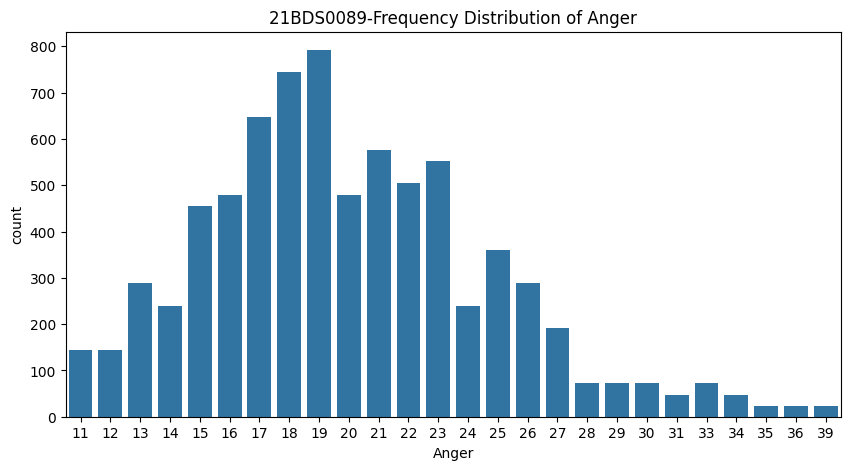

In [ ]:
# Frequency distribution plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Anger', data=data)
plt.title("21BDS0089-Frequency Distribution of Anger")
plt.show()

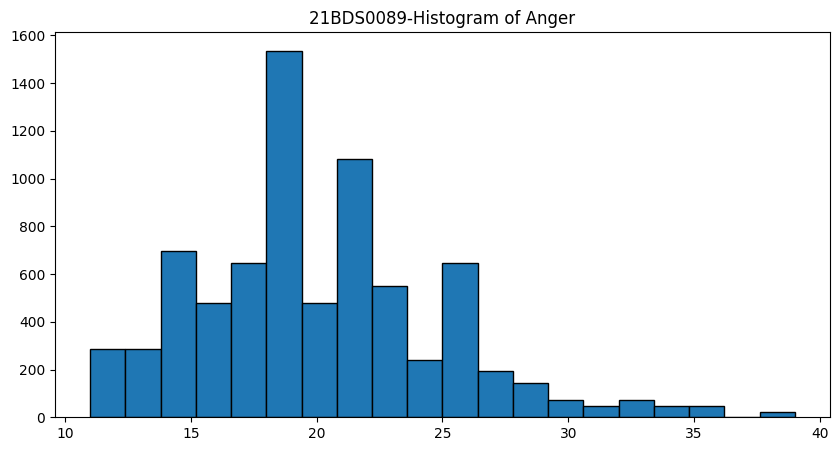

In [ ]:
# Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Anger'], bins=20, edgecolor='black')
plt.title("21BDS0089-Histogram of Anger")
plt.show()

In [ ]:
# Relative frequency distribution and cumulative frequency distribution
relative_freq = freq_dist / len(data)
cumulative_freq = freq_dist.cumsum()

print(f"Relative Frequency: \n{relative_freq}")
print(f"Cumulative Frequency: \n{cumulative_freq}")


Relative Frequency: 
Anger
11    0.018987
12    0.018987
13    0.037975
14    0.031646
15    0.060127
16    0.063291
17    0.085443
18    0.098101
19    0.104430
20    0.063291
21    0.075949
22    0.066456
23    0.072785
24    0.031646
25    0.047468
26    0.037975
27    0.025316
28    0.009494
29    0.009494
30    0.009494
31    0.006329
33    0.009494
34    0.006329
35    0.003165
36    0.003165
39    0.003165
Name: count, dtype: float64
Cumulative Frequency: 
Anger
11     144
12     288
13     576
14     816
15    1272
16    1752
17    2400
18    3144
19    3936
20    4416
21    4992
22    5496
23    6048
24    6288
25    6648
26    6936
27    7128
28    7200
29    7272
30    7344
31    7392
33    7464
34    7512
35    7536
36    7560
39    7584
Name: count, dtype: int64


5. Dispersion Box Plots

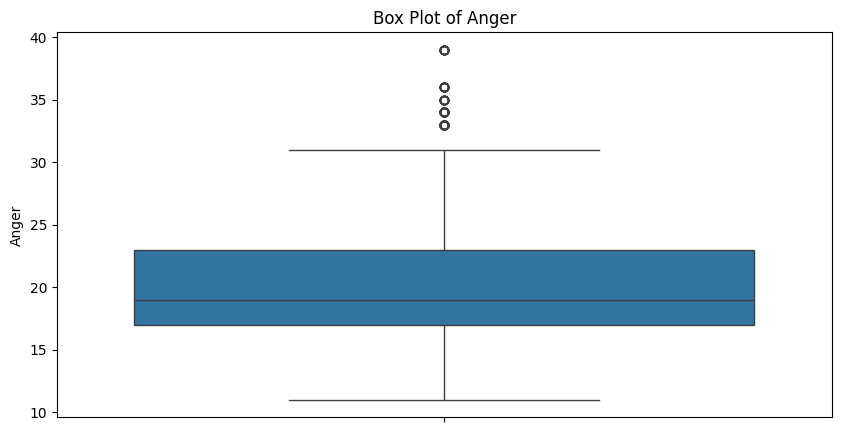

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['Anger'])
plt.title("Box Plot of Anger")
plt.show()

6. Categorical Values - Frequency Distribution and Plots

Gender
F    5832
M    1752
Name: count, dtype: int64


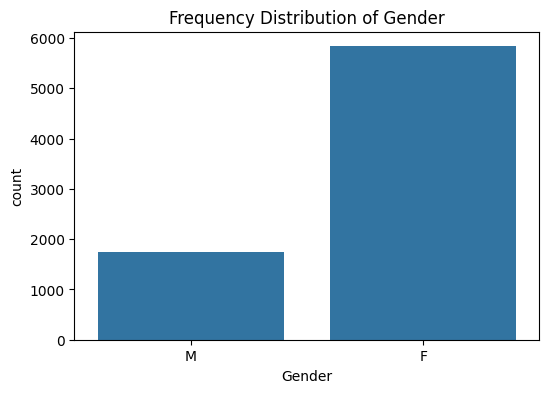

In [ ]:
# Frequency distribution for 'Gender'
gender_freq = data['Gender'].value_counts()
print(gender_freq)

# Bar plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title("Frequency Distribution of Gender")
plt.show()


7. Categorical Plots - Pie and Stacked Bar Plot

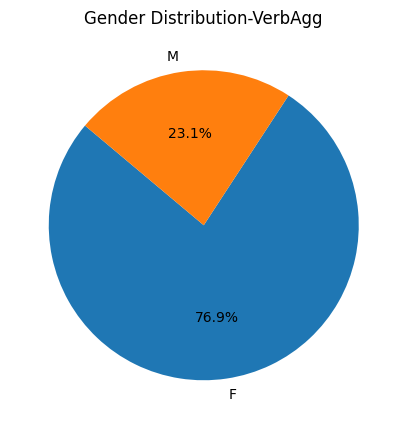

In [ ]:
# Pie plot for 'Gender'
plt.figure(figsize=(5, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution-VerbAgg")
plt.ylabel("")
plt.show()

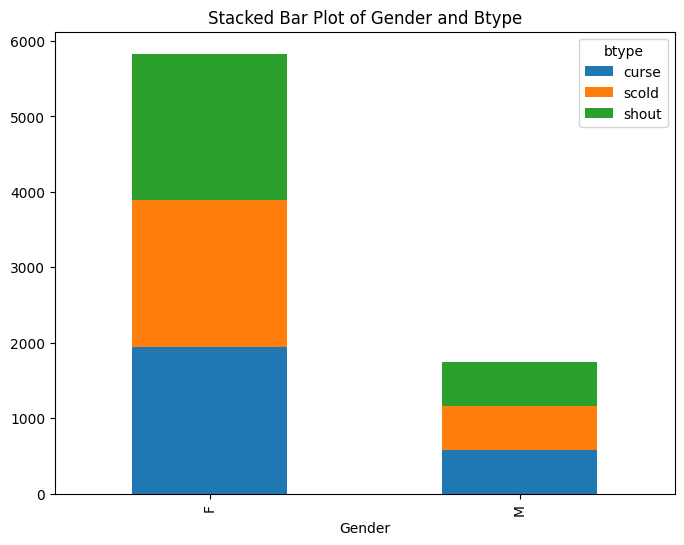

In [ ]:
# Stacked bar plot for 'Gender' and 'btype'
stacked_data = pd.crosstab(data['Gender'], data['btype'])
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Stacked Bar Plot of Gender and Btype")
plt.show()

## **2-D STATISTICAL ANALYSIS**

1. Two-Way Contingency Tables

In [ ]:
# Categorical-Categorical: Gender vs btype
cat_cat_table = pd.crosstab(data['Gender'], data['btype'])
print("Categorical-Categorical Table:\n", cat_cat_table)

# Numerical-Numerical: Correlation between 'Anger' and 'id'
num_num_corr = data[['Anger', 'id']].corr()
print("\nNumerical-Numerical Correlation:\n", num_num_corr)

# Categorical-Numerical: Mean Anger by Gender
cat_num_table = data.groupby('Gender')['Anger'].mean()
print("\nCategorical-Numerical Table (Mean Anger by Gender):\n", cat_num_table)


Categorical-Categorical Table:
 btype   curse  scold  shout
Gender                     
F        1944   1944   1944
M         584    584    584

Numerical-Numerical Correlation:
           Anger        id
Anger  1.000000 -0.050706
id    -0.050706  1.000000

Categorical-Numerical Table (Mean Anger by Gender):
 Gender
F    20.053498
M    19.835616
Name: Anger, dtype: float64


2. Three-Way Contingency Table

In [ ]:
# Gender, btype, and situ
three_way_table = pd.crosstab([data['Gender'], data['btype']], data['situ'])
print("Three-Way Contingency Table:\n", three_way_table)

Three-Way Contingency Table:
 situ          other  self
Gender btype             
F      curse    972   972
       scold    972   972
       shout    972   972
M      curse    292   292
       scold    292   292
       shout    292   292


3. Contingency Table Analysis - Gender and Btype

In [ ]:
# Row Profile
row_profile = cat_cat_table.div(cat_cat_table.sum(axis=1), axis=0)
print("Row Profile:\n", row_profile)

# Column Profile
col_profile = cat_cat_table.div(cat_cat_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Relative Frequency Table
relative_freq_table = cat_cat_table / cat_cat_table.values.sum()
print("\nRelative Frequency Table:\n", relative_freq_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(cat_cat_table)
print(f"\nChi-Square Test:\n Chi2: {chi2}, p-value: {p}, DOF: {dof}\n\nExpected Frequencies:\n{expected}")


Row Profile:
 btype      curse     scold     shout
Gender                              
F       0.333333  0.333333  0.333333
M       0.333333  0.333333  0.333333

Column Profile:
 btype      curse     scold     shout
Gender                              
F       0.768987  0.768987  0.768987
M       0.231013  0.231013  0.231013

Relative Frequency Table:
 btype      curse     scold     shout
Gender                              
F       0.256329  0.256329  0.256329
M       0.077004  0.077004  0.077004

Chi-Square Test:
 Chi2: 0.0, p-value: 1.0, DOF: 2

Expected Frequencies:
[[1944. 1944. 1944.]
 [ 584.  584.  584.]]


4. Scatter Plot for 2 variables

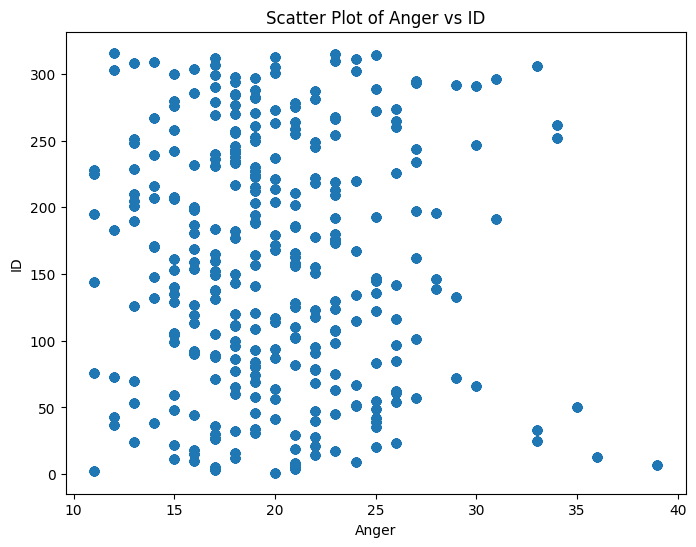

In [ ]:
# Scatter plot for 'Anger' and 'id'
plt.figure(figsize=(8, 6))
plt.scatter(data['Anger'], data['id'])
plt.xlabel("Anger")
plt.ylabel("ID")
plt.title("Scatter Plot of Anger vs ID")
plt.show()

5. Scatter Plot for 3 Variables

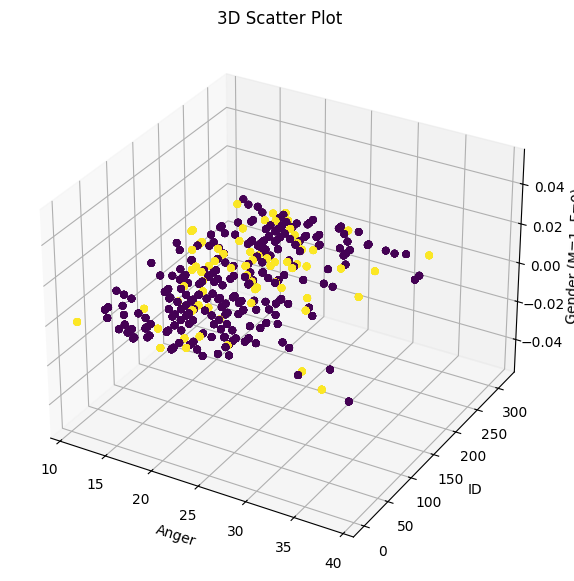

In [ ]:
# 3D Scatter plot for 'Anger', 'id', and 'Gender'
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Anger'], data['id'], c=(data['Gender'] == 'M').astype(int))
ax.set_xlabel('Anger')
ax.set_ylabel('ID')
ax.set_zlabel('Gender (M=1, F=0)')
plt.title("3D Scatter Plot")
plt.show()

6. 3D Bar Plot

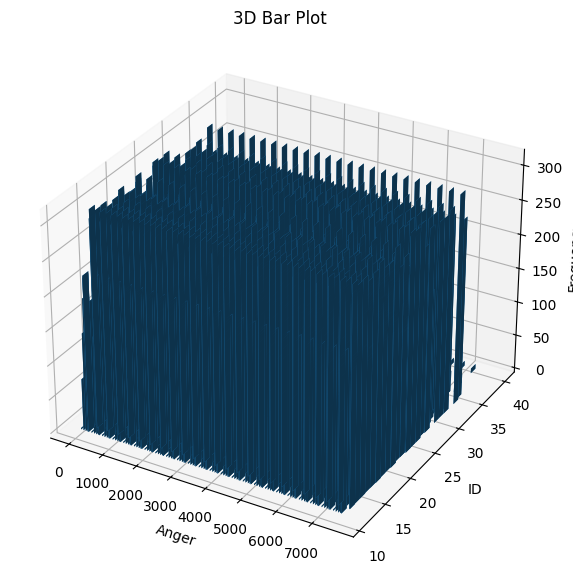

In [ ]:
# 3D Bar Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(data['Anger']))
y = data['Anger']
z = np.zeros(len(data))
dx = dy = np.ones(len(data))
dz = data['id']
ax.bar3d(x, y, z, dx, dy, dz)
ax.set_xlabel('Anger')
ax.set_ylabel('ID')
ax.set_zlabel('Frequency')
plt.title("3D Bar Plot")
plt.show()

7. Sunburst plot

In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['Gender', 'btype', 'situ'])
fig.show()

8.  2D Box Plot with One Categorical Variable

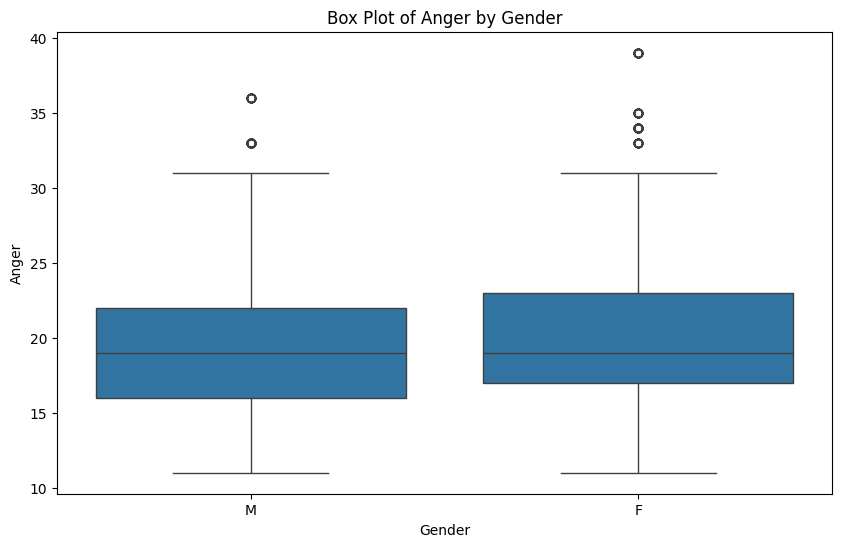

In [ ]:
# Box plot of 'Anger' grouped by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Anger', data=data)
plt.title("Box Plot of Anger by Gender")
plt.show()